# CPA - Key Recovering

When focusing on key recovering, CPA uses the Pearson Correlation Coefficient to reveal the "collision" of secret constant data with public variable information.

`_fixedkey` traces are used to reveal the fixed secret key.

In [1]:
from cpa_key import datasets, poi_selectors
import numpy as np
import lascar
lascar.logger.setLevel(lascar.logging.CRITICAL)

In [2]:
poi_selector_name = 'subbytes'
poi_selector = poi_selectors[poi_selector_name]

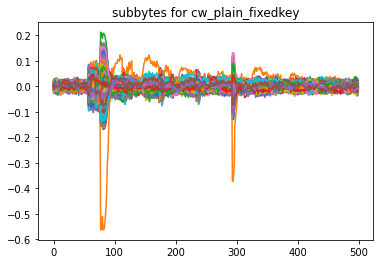

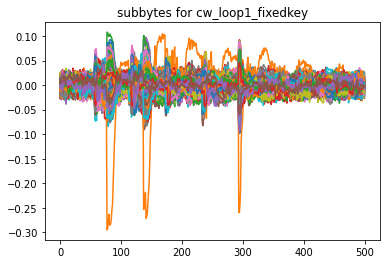

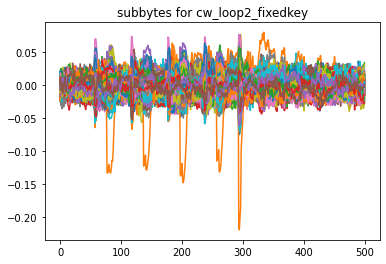

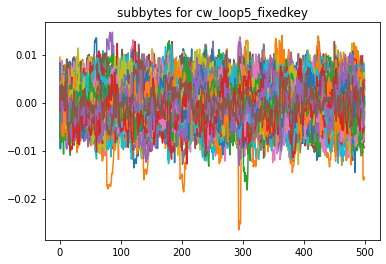

In [3]:
for dataname, data in datasets.items():
    trace = lascar.TraceBatchContainer(data['trace'], data['input'])
    engine = lascar.CpaEngine(
        name=f'{poi_selector_name} for {dataname}',
        selection_function=poi_selector,
        guess_range=range(256),
    )

    session = lascar.Session(
        trace,
        engine=engine,
        output_method=lascar.MatPlotLibOutputMethod(engine),
        progressbar=False,
    )
    session.run(batch_size=100_000)
